Logistic Regression Algorithm
Red 'x' means student failed, and green 'o' means student was approved: 


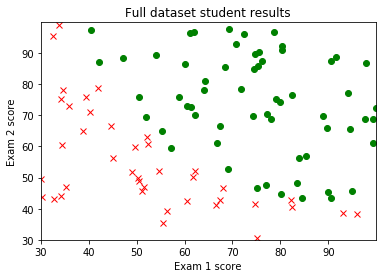


Training set:
0.6931471805599454
0.6037059326020183
0.5643368466337026
0.5315464318590295
0.5040509912986142
0.4808206320612796
0.461039784854597
0.4440658369086369
0.4293923549535657
0.41661882951242507
0.4054267717193172
0.3955612244306759
0.38681660469578716
0.3790258995159198
0.37205241433702385
0.36578344995774753
0.36012543309291833
0.35500014414077885
0.3503417759914293
0.34609462533375007
0.3422112680901203
0.33865110770024054
0.33537921239622376
0.3323653779281725
0.3295833673095574
0.3270102904422211
0.3246260949621245
0.3224131460542853
0.3203558778542627
0.318440502775482
0.31665476796379305
0.3149877502945233
0.3134296830496327
0.3119718087601629
0.3106062537593221
0.3093259208300451
0.3081243969975349
0.3069958740499541
0.3059350797981526
0.3049372184303523
0.30399791859731096
0.3031131880910825
0.3022793741664854
0.3014931287070768
0.30075137756321596
0.30005129349382964
0.29939027222987424
0.2987659112494215
0.29817599091445607
0.2976184576698947
0.2970914090478069
0.2

0.30587300823327473
0.30590615851557423
0.3059391867420717
0.3059720933595027
0.3060048788133622
0.30603754354789986
0.3060700880061088
0.3061025126297254
0.30613481785922
0.3061670041337905
0.3061990718913601
0.30623102156857085
0.30626285360077726
0.30629456842204456
0.3063261664651417
0.3063576481615389
0.30638901394140367
0.3064202642335963
0.3064513994656677
0.3064824200638516
0.30651332645306895
0.30654411905691864
0.3065747982976773
0.3066053645962961
0.30663581837239845
0.30666616004427844
0.30669639002889726
0.3067265087418846
0.30675651659753284
0.30678641400879536
0.3068162013872905
0.30684587914329425
0.3068754476857435
0.3069049074222312
0.3069342587590086
0.30696350210098333
0.30699263785171926
0.30702166641343415
0.30705058818700176
0.3070794035719494
0.3071081129664615
0.3071367167673751
0.3071652153701841
0.30719360916903576
0.3072218985567335
0.3072500839247363
0.3072781656631611
0.3073061441607803
0.307334019805025
0.3073617929819841
0.3073894640764093
0.307417033471

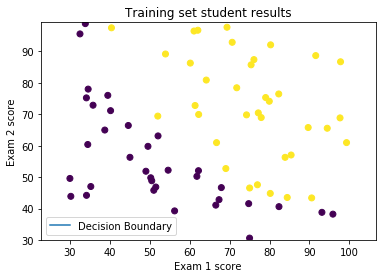

Model performance on the training set (precision): 0.8767123287671232

Testing set:


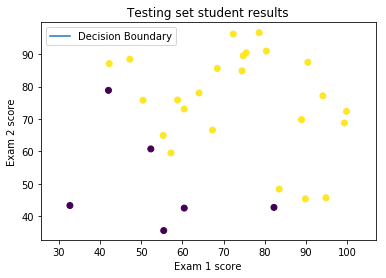

Model performance on the training set (precision): 20.0 %

New prediction: 
[0]


In [126]:
# Import Libraries
import string, math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from pylab import *
np.seterr(all = 'warn') 
%matplotlib inline


# Function to get and divide dataset into y(Blood pressure) and X (Age)
def preprocess():
    f = open("grades_data.txt", "r")
    if f.mode == 'r':
        # Read dataset
        contents = f.read()
        dataset = np.array([[float(j) for j in i.split(',')] for i in contents.splitlines()])

        # Separate features from results 
        X, y = dataset[:, :-1], dataset[:, 2:]
#         X = np.square(X)
        y = y.astype(int)
        print("Logistic Regression Algorithm")
        print("Red 'x' means student failed, and green 'o' means student was approved: ")
        
        # Plotting the 
        plt.title("Full dataset student results")
        plt.xlabel('Exam 1 score')
        plt.ylabel('Exam 2 score')
        for i in range(len(X)):
            if y[i] == 1:
                plt.plot(X[i,0],X[i,1], 'go')
            else:
                plt.plot(X[i,0],X[i,1], 'rx')
        plt.axis([np.amin(X), np.amax(X), np.amin(X), np.amax(X)])
        plt.show()
        
        # Divide dataset into test set (70%) and train set (30%) and separate into x_train, y_train, x_test, y_test
        x_train, x_test = np.split(X,[int((0.7 * len(X)))])
        y_train, y_test = np.split(y,[int((0.7 * len(y)))])
        
        return x_train, y_train, x_test, y_test

# Logistic regression function
def sigmoid(matrix):
    return 1.0 / (1 + np.exp(-matrix))

# Error mean
def logistic_loss(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))

# Function to make the Gradient Descent operation
def gradient_descent(x_train, y_train, step_size, iterations):
    # Initialize wieghts array to ones
    w = np.zeros((2,1))
    b = np.zeros((1,1))
    m = len(y_train)
    x2 = np.square(x_train)
    # Training process
    for epoch in range(iterations):
        z = np.matmul(x_train, w) + b + np.matmul(x2, w)
        a = sigmoid(z)
        loss = logistic_loss(y_train, a)
        
        # Back propagation
        dz = a - y_train
        dw = 1/m * np.matmul(x_train.T, dz)
        db = np.sum(dz)

        # Gradient descent update 
        w = w - step_size * dw
        b = b - step_size * db
 
        # Uncomment to check the loss reduction on the training 
        if epoch % 10000 == 0:
            print(loss)

    # Plot training results
    plt.title("Training set student results")
    plot(x_train, y_train, b, w)

    # Check model performance
    preds = []
    for i in sigmoid(z):
        if i > 0.5:
            preds.append(1)
        else:
            preds.append(0)
            
    print('Model performance on the training set (precision):',f1_score(preds, y_train))
    
    return w, b, z

# Plot results 
def plot(x, y, b, w):
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.scatter(x[:,0], x[:,1], c = y.ravel())
    ax = plt.gca()
    xvals = np.array(ax.get_xlim()).reshape(-1,1)
    yvals = -(xvals * w[0][0] + b) / w[1][0]
    plt.plot(xvals, yvals)
    plt.ylim(np.amin(x), np.amax(x))
    plt.legend(['Decision Boundary'])
    plt.show()

# Predict wheter a student will pass or not
def predict(x, w, b):
    z = np.matmul(x, w) + b
    a = sigmoid(z)
    test_preds = []
    for i in sigmoid(z):
        if i > 0.5:
            test_preds.append(1)
        else:
            test_preds.append(0)
            
    return test_preds

# Evaluate the test set and return the accuracy of the model
def test_set_predicting(x, y, w, b):
    counter = 0
    test_results = predict(x, w, b)

    # Plot testing set
    plt.title("Testing set student results")
    plot(x, y, b, w)
    
    # Get the error percentage on the test set prediction 
    for i in range(len(test_results)):
        if int(y[i]) != test_results[i]:
            counter += 1
    accuracy = 100 - ((100 * counter) / len(test_results))
    print('Model performance on the training set (precision):', accuracy, '%')

# Start App
if __name__ == '__main__':
    # Get data
    x_train, y_train, x_test, y_test = preprocess()

    # Step size (gradient descent)
    step_size = 0.002799
    step_size = 0.000008
#     step_size = 0.0000002


    # Number of iterations (epochs)
#     iterations = 3000000
    iterations = 5000000

    # Execute the training algorithm 
    print('\nTraining set:')
    w_array, bias_array, z = gradient_descent(x_train, y_train, step_size, iterations)
    
    # Predict the test set to check the accuracy of the model
    print('\nTesting set:')
    test_set_predicting(x_test, y_test, w_array, bias_array)
    
    # Test new entry
    print('\nNew prediction: ')
    test_preds = print(predict([84.43281996120035,43.53339331072109], w_array, bias_array))

